PRCP-1000-Portuges Bank

# Business Case

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers,
by a Portuguese banking institution from May 2008 to November 2010.

**The Goal of this data analysis is as follows:**

Prepare a complete data analysis report on the given data.

Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Suggestions to the Bank market team to make  customers  buy the product.


# Task 1:-Prepare a complete data analysis report on the given data.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading in the dataset

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Domain Analysis

AGE: The length of time that a person has lived or a thing has existed.

JOB: A task or piece of work, especially one that is paid.

MARITAL: Relating to marriage or the relationship of a married couple are not.

EDUCATION: The process of receiving or giving systematic instruction, especially at a school or university.

DEFULT: Failure to fulfill an obligation, especially to repay a loan or appear in a court of law.

HOUSING: The person having house loan are not.

LOAN: A bank loan is an arrangement in which a bank gives you money that you repay with interest.The person having loan are not. 

CONTACT: Its a one type of communication medium to connect with the person with cellular or telephone.

MONTH: When they last contact month of year.

DAY OF WEEK: When they last contact day of the week.

DURATION: The time during which something continues. by means when they last contact and how much time they spend in call duration, in seconds (numeric).

CAMPAIGN: Its a series of coordinated activities, such as public speaking and demonstrating, designed to achieve a social, political, or commercial goal. Number of contacts performed during this campaign and for this client.

PDAYS: Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).

PREVIOUS: Number of contacts performed before this campaign and for this client (numeric).

POUTCOME: Outcome of the previous marketing campaign. by means the client is accepted or not accepted or nonexistent.

EMP.VAR.RATE(Employment variation rate): The labor rate variance measures the difference between the actual and expected cost of labor. quarterly indicator (numeric).

CONS.PRICE.IDX(consumer price index): an index of the variation in prices paid by typical consumers for retail goods and other items. monthly indicator (numeric).

CONS.CONF.IDX(consumer confidence index):  Consumer confidence, measured by the Consumer Confidence Index (CCI), is defined as the degree of optimism about the state of the economy that consumers (like you and me) are expressing through their activities of saving and spending.- monthly indicator (numeric).

EURIBOR3M(euribor 3 month rate): Euribor 3 Months means a rate equal to the Floating Rate.

NR.EMPLOYED(number of employees): Number of Employees means the number of employees engaged at the place of business each regular working day during the preceding calendar year.

Y(YES/NO): has the client subscribed a term deposit? or not.

# Basic Checks

In [3]:
rows = df.shape[0]
cols = df.shape[1]

print(f'In this dataset we have {rows} rows and {cols} columns')

In this dataset we have 41188 rows and 21 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(f"In the dataset there are {len(df.select_dtypes('O').columns)} categorical columns")
print(f"In the dataset there are {len(df.select_dtypes('number').columns)} numerical columns")

In the dataset there are 11 categorical columns
In the dataset there are 10 numerical columns


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.describe(include = 'O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Exploratory Data Analysis

## Univariant Analysis

At first we will split our dataset into two with one containing only numerical features and the other containing all the categorical features

In [8]:
cat_df = df.select_dtypes('O')
num_df = df.select_dtypes('number')

### Visualizing the numerical columns

Lets visualize our numerical dataset with histogram with kde curve to view the distribution of data of our numerical features

In [9]:
num_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


#### Visualizing the distribution of ages of customers in our dataset

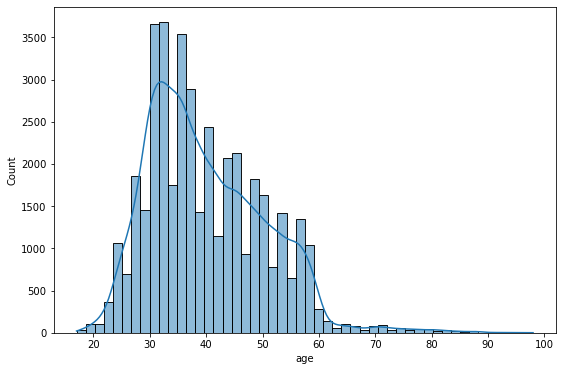

In [10]:
plt.figure(figsize = (9,6))
sns.histplot(num_df['age'],bins =50,kde =True);

**Our Insights:**

Here we see that in our dataset, most customers are of 30-40 years of age.

There are some customers who are more that 90 years of age.

The distribution is heavily skewed to the right


#### Visualizing the distribution of duration of marketing call to customers in our dataset

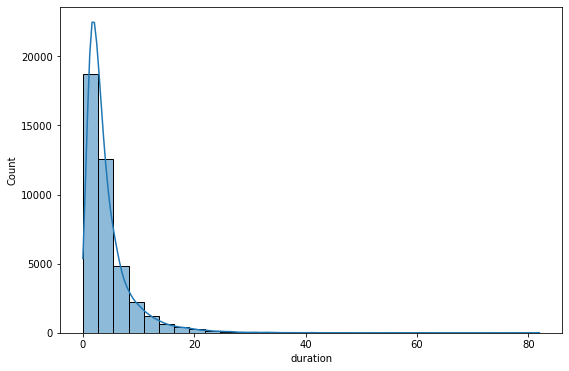

In [11]:
plt.figure(figsize = (9,6))
sns.histplot(num_df["duration"] / 60,bins =30,kde =True);

**Our Insights:**

In our Bank marketing dataset most of the customers call lasted from 0 to 5 mins

There are some calls that lasted way more than regular calls

There are extreme outliers that has to be taken care of later

The distribution is heavily skewed towards the right


#### Visualizing the distribution of number of days that passed by after the client was last contacted from a previous campaign in our dataset

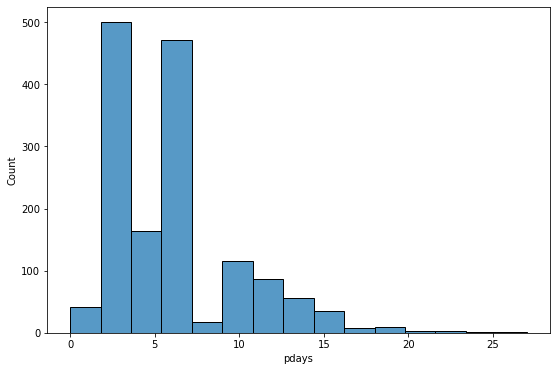

In [12]:
plt.figure(figsize = (9,6))
sns.histplot(num_df[num_df["pdays"]<999]['pdays'],bins = 15);

**Our Insights:**

Most of the customers in our dataset were not contacted by the marketing team. Here we have dropped these rows to better visualize the days past by after a customer was contacted.

Here we see a right skewed distribution where most of the customers who were contacted the days passed were from between 3 - 7 days.

#### Visualizing the distribution of number of contacts performed during this campaign and for this client of our dataset

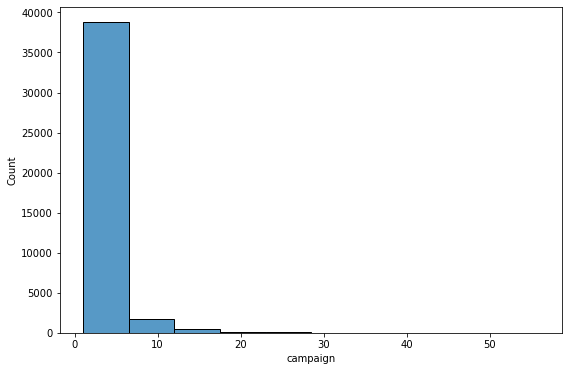

In [13]:
plt.figure(figsize = (9,6))
sns.histplot(num_df['campaign'],bins = 10);

**Our Insights:**

Here we see the right skewed distribution of number of contacts performed during this campaign and for this client. Here most of the customers were contacted 1- 8 days

#### Visualizing the distribution of other numerical features of our dataset

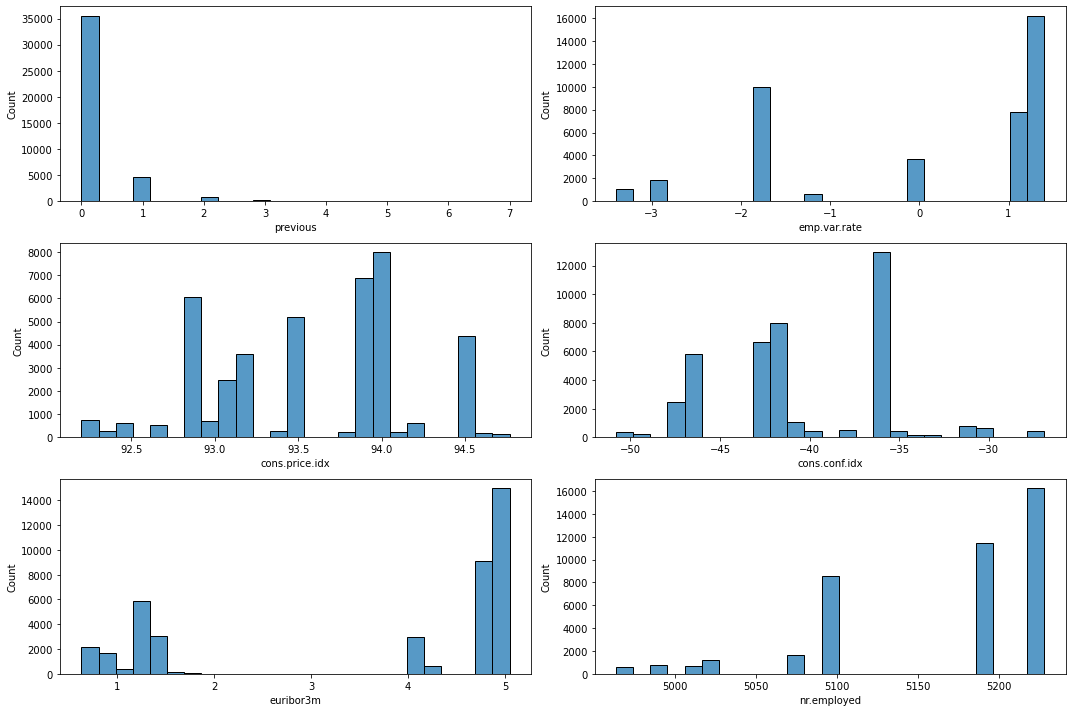

In [14]:
cols = num_df.columns[4:].to_list()

# create a new dataframe with only the selected columns
df_selected = df[cols]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# plot histograms for each column
for i, col in enumerate(df_selected.columns):
    sns.histplot(data=df_selected, x=col,bins = 25, ax=axs[i])
    axs[i].set_xlabel(col)
    

plt.tight_layout()
plt.show()

**Our Insights:**

1) previous: The distribution of number of contacts performed before this campaign and for this client shows that previosly most customers were not contacted

2) emp.var.rate: The distribution of employment variation rate - quarterly indicator feature shows most of the values are positive in a left skewed distribution.

3) euribor3m : The distribution is relatively skewed to the left. Other features are also more or less skewed 

### Visualizing the categorical columns

In [15]:
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


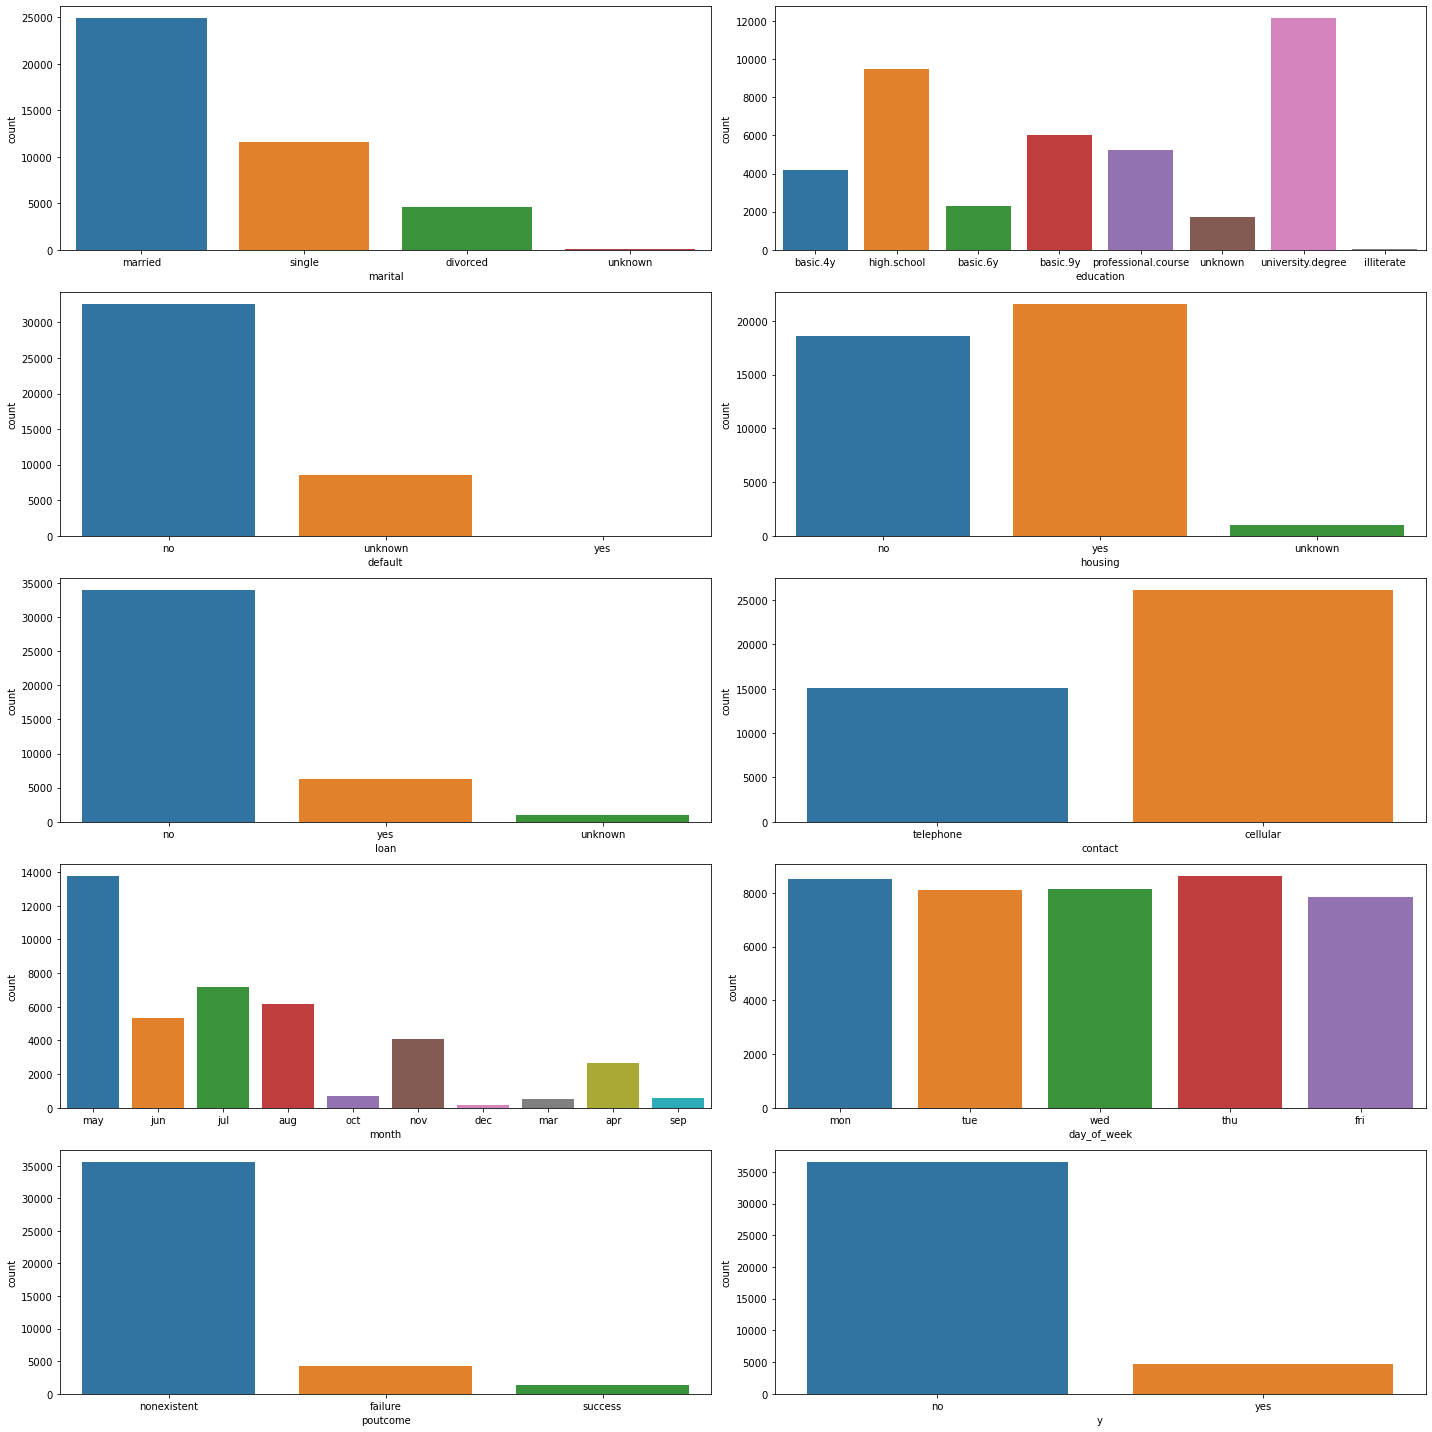

In [16]:
cols = cat_df.columns[1:].to_list()
df_selected = cat_df[cols]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
axs = axs.flatten()

# plot countplot for each feature
for i, col in enumerate(df_selected.columns):
    sns.countplot(data=df_selected, x=col, ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

**Our Insights:**

1) We see that married customers who has a university degree education with no default on loans are relatively more in our dataset.

2) Most of the customers are being contacted via cellphone and most customers do not have a loan and in month of May customer engagement were the highest

3) Here we also notice that we have a highly imbalanced dataset

## Bivariate Analysis

### Bivariate analysis of all the categorical columns with respect to whether person will take the term deposit or not:

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Visualizing which customer subscribed to the deposit based on their job

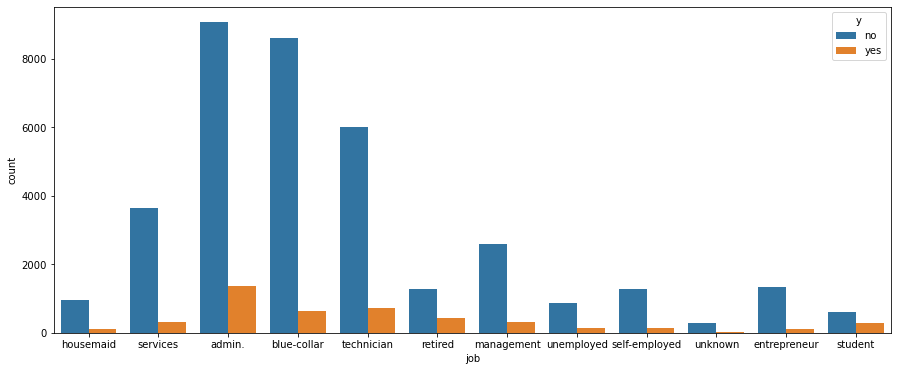

In [18]:
plt.figure(figsize=(15,6))

sns.countplot(data=df,x = df['job'],hue = df['y']);

**Our Insights:**
    
Here we see that admin and blue collar workers are subscribing to the deposit

#### Visualizing which customer subscribed to the deposit based on their education

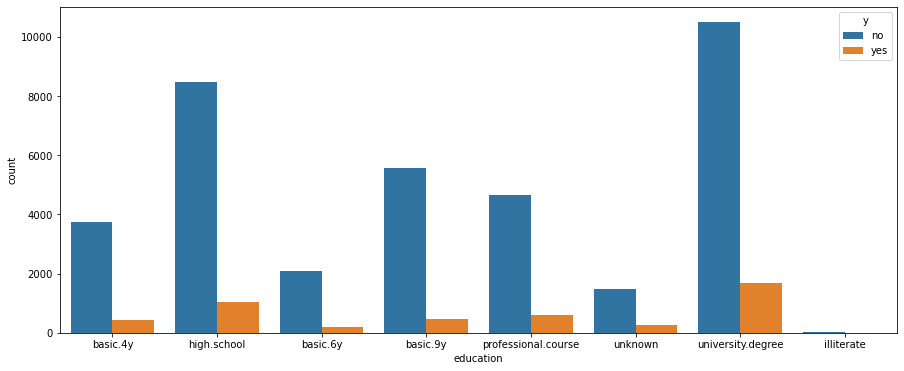

In [19]:
plt.figure(figsize=(15,6))

sns.countplot(data=df,x = df['education'],hue = df['y']);

**Our Insights:**
    
We find that customers with university degree and high school degree are subscribing to the deposit

#### Visualizing which customer subscribed to the deposit and whether they defaulted on their loan

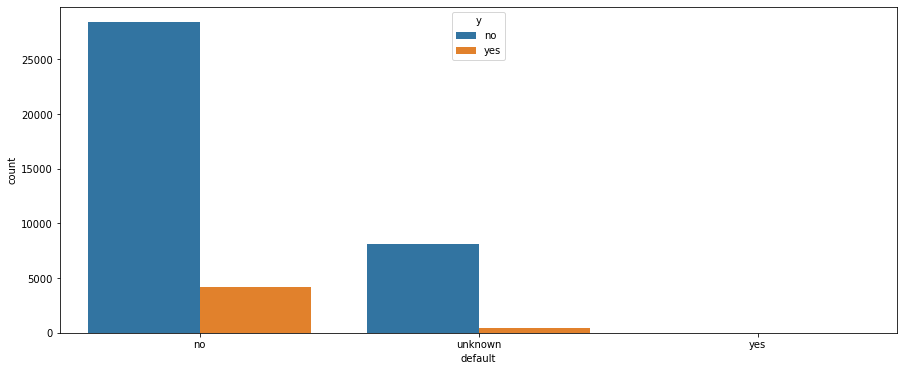

In [20]:
plt.figure(figsize=(15,6))

sns.countplot(data=df,x = df['default'],hue = df['y']);

**Our Insights:**

We find that most of the customers who subscribed to the term deposit have not defaulted on their loan. Very few people defaulted on their loan, which is a good sign for any bank.

On the other hand we see a number of people in the unknown category; we think that these customers could currently have a loan and it is yet to be repaid and have not been defaulted; as such it is unknown where the customer will default on the loan or not.

#### Visualizing which customer subscribed to the deposit and whether they have any type of loan

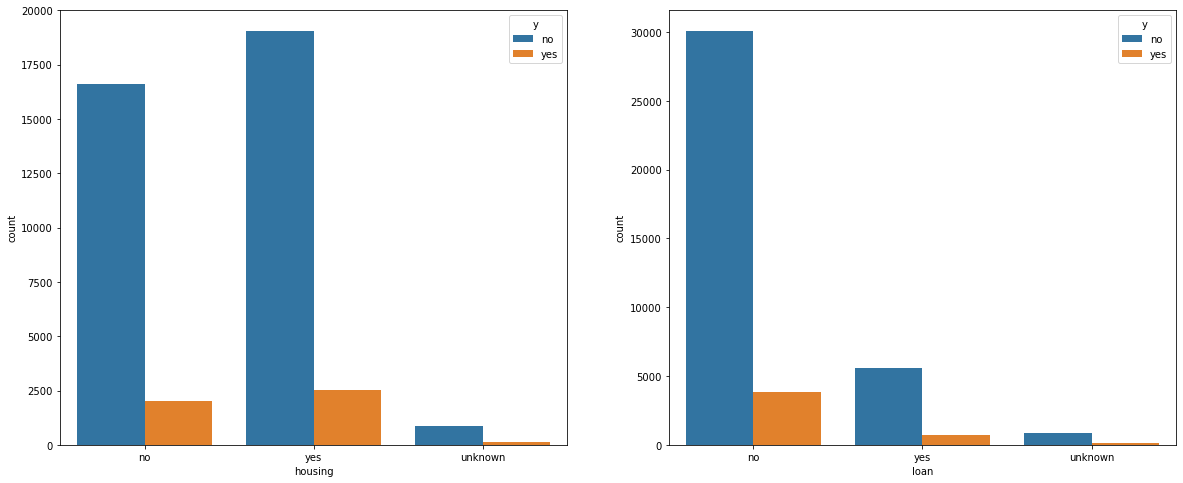

In [21]:
columns = cat_df.columns[4:-5].to_list()
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col,hue=df['y']  ,ax=axs[i])
    
plt.show()

**Our Insights:**

Most of the customers who has housing loan are subscribing to the deposit.

Most of the customers who does not have a personal loan are subscribing to the deposit.

#### Visualizing which customer subscribed to the deposit and whether they have been contacted, which time they were contacted and what was the outcome of the contact?

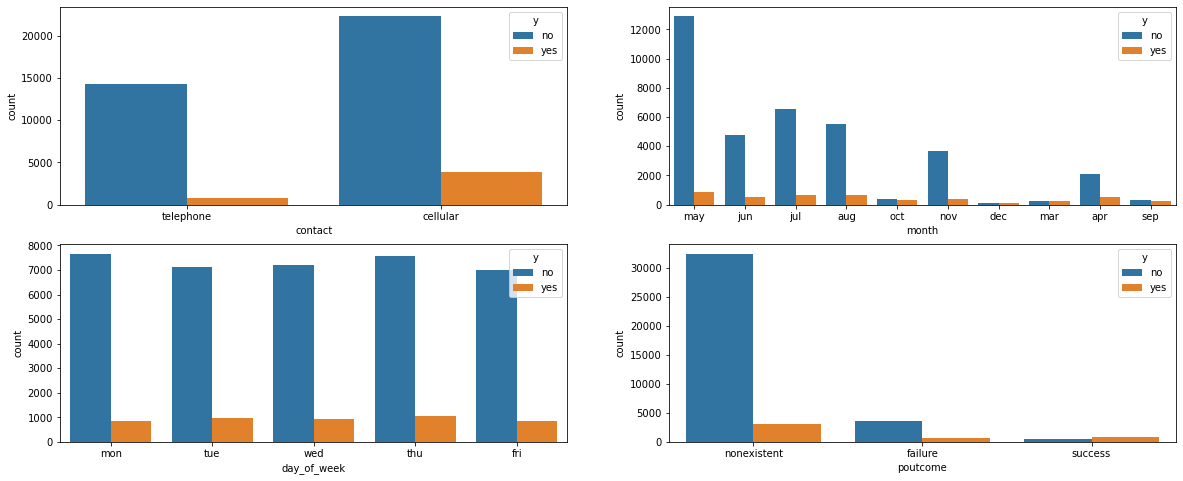

In [22]:
columns = cat_df.columns[6:-1].to_list()
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col,hue=df['y']  ,ax=axs[i])
    
plt.show()

**Our Insights:**

Here we see that most people who subscribed to deposit were contacted by cellphone.

In the month of May and June customers were contacted the most; most of these customers did not subscribed to the term deposit so maybe the marketing team is trying to onboard these customers.

Relatively in all working days of the week, customers were made contact with the marketing team and most of these customers were yet to subscibe to the term deposit.

The previous marketing campaign does not look good as the sucess rate is very low and most of the customers are yet to reached.

### Bivariate analysis of all the numerical columns with respect to whether person will take the term deposit or not:

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Visualizing which age of customers are subscribed to term deposit

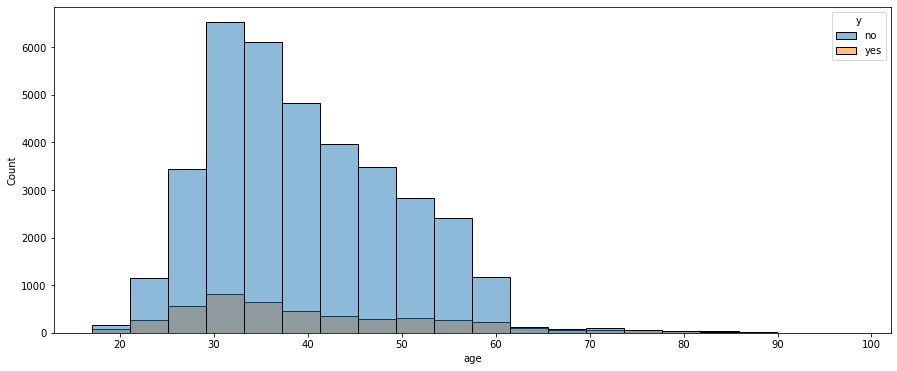

In [24]:
plt.figure(figsize = (15,6))
sns.histplot(data =df,x = 'age',bins = 20,hue ='y');

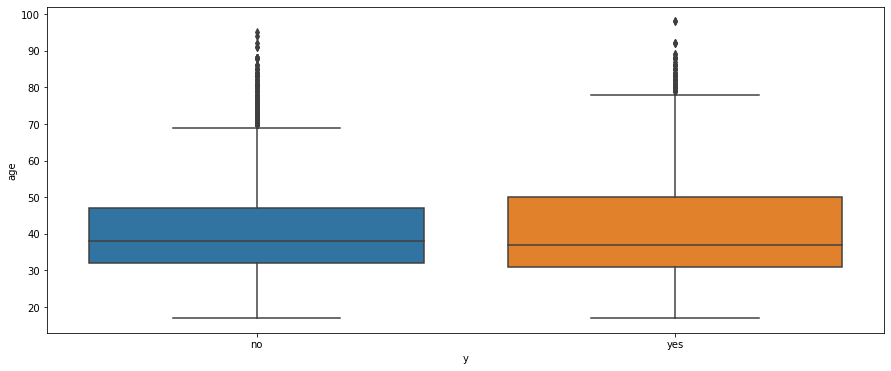

In [25]:
plt.figure(figsize = (15,6))
sns.boxplot(data=df,x='y',y='age');

**Our Insights:**

At age 30-35, customers are more likely to get the term deposit

#### Visualizing the relationship between consumer confidence index and consumer price index in relation with whether customer subscribed to deposite or not

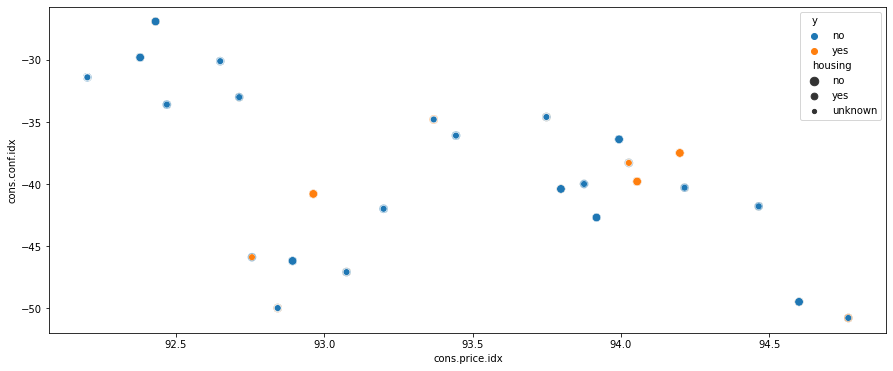

In [26]:
plt.figure(figsize = (15,6))
sns.scatterplot(data =df,x = 'cons.price.idx',y= 'cons.conf.idx',hue = 'y',size = 'housing');

**Our Insights:**

Here we see that as more customers are likely to subscibe to term deposit when the consumer price index and consumer confidence index are going up.

#### Visualizing the relationship between employment variation rate and education with respect to customer subscribed to deposit

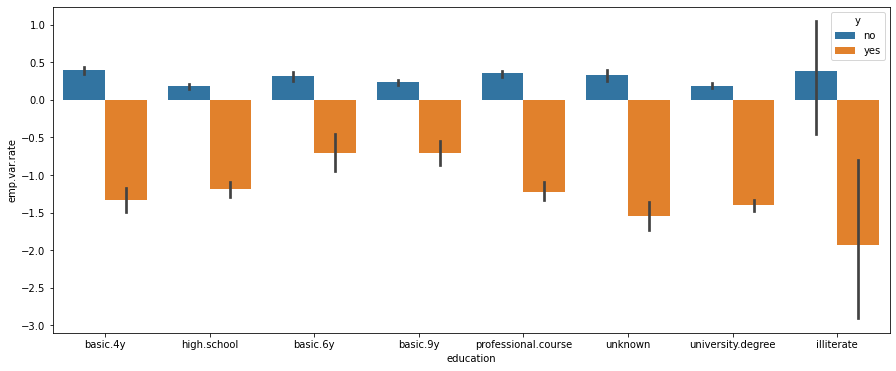

In [27]:
plt.figure(figsize = (15,6))
sns.barplot(data =df,y = 'emp.var.rate',x = 'education',hue ='y');

**Our Insights:**
    
Here we see during low employment variation rate, illterate customers tend to subscribe to term deposit

## MULTI VARIATE

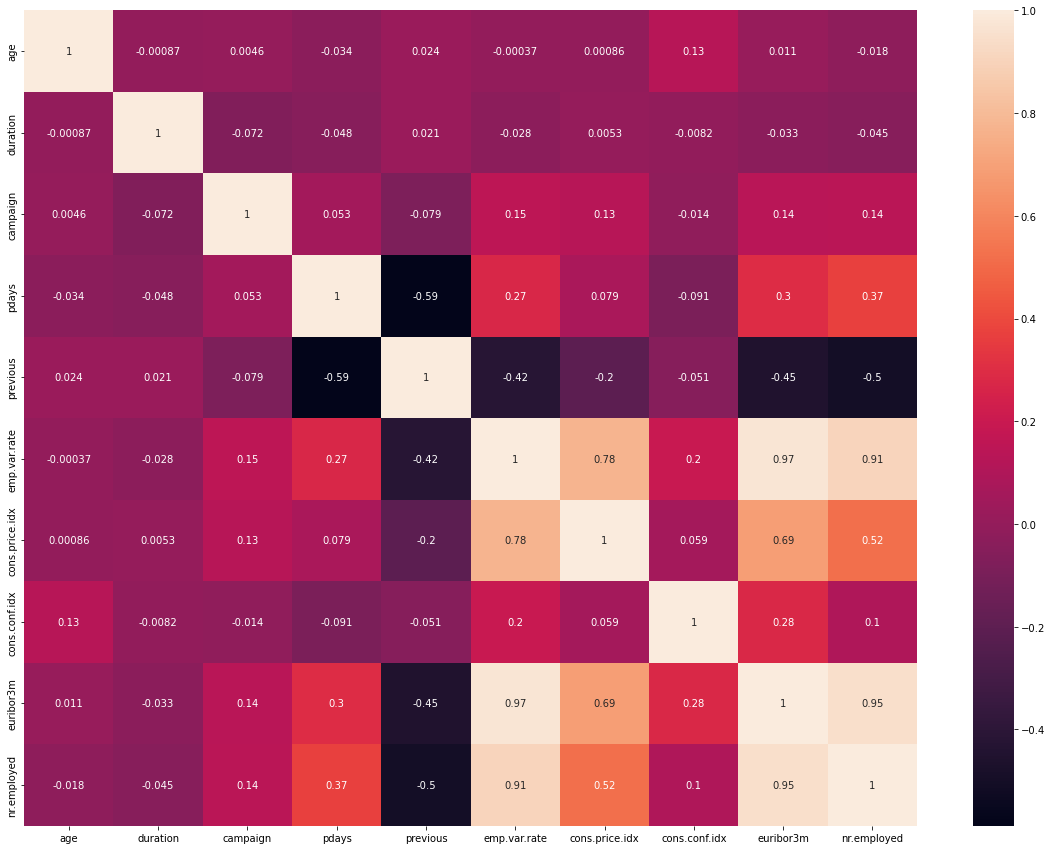

In [28]:
plt.figure(figsize=(20,15),facecolor='white')
sns.heatmap(data=df.corr(),annot=True)
plt.show()

### Insights;
1. here we found that euribor3m and nr.employed are 0.95%  correlated.
2. here we found that euribor3m and emp.var.rate are 0.97% correlated.
3. here we found that emp.var.rate and nr.emoloyed are 0.91% correlated.

## Data preprocessing
Handling missing values 


In [29]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We have missing values as in dataset given as 'unknown'; however we have decided to keep this 'unknown' values as a class of its own.

## Dealing with outliers

In [30]:
numercial_cols = df.select_dtypes("number")
numercial_cols.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0


## Finding Outliers using Z-Score Index

In [31]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(numercial_cols))
threshold = 3
outliers = np.where(z > threshold)
print(f"Using 'Z-Score Index we found there are {len(outliers[0])} Outliers")

Using 'Z-Score Index we found there are 4678 Outliers


Since our dataset is not normaly distributed so it is better to avoid Z-Score index and go for more robust statistical methods such as the median absolute deviation (MAD) method

#### Finding Outliers using Mean Absolute Deviation

In [32]:
median = numercial_cols.median()
mad = numercial_cols.mad()
outliers_using_MAD = numercial_cols[(numercial_cols - median).abs() > 3 * mad]

In [33]:
list1 = []
dict1={}
for i in outliers_using_MAD:
    outlier1 = outliers_using_MAD[i].values>0
    for j in outlier1:
        if j == True:
            list1.append(i)
for k in list1:            
    dict1.update({k: list1.count(k)})

pd.DataFrame(dict1,index=['Outliers_Detected_using_MAD']).T


,Outliers_Detected_using_MAD
age,720
duration,2513
campaign,2406
pdays,1500
previous,5625
cons.price.idx,770
nr.employed,1408


### Finding Outliers using box plots

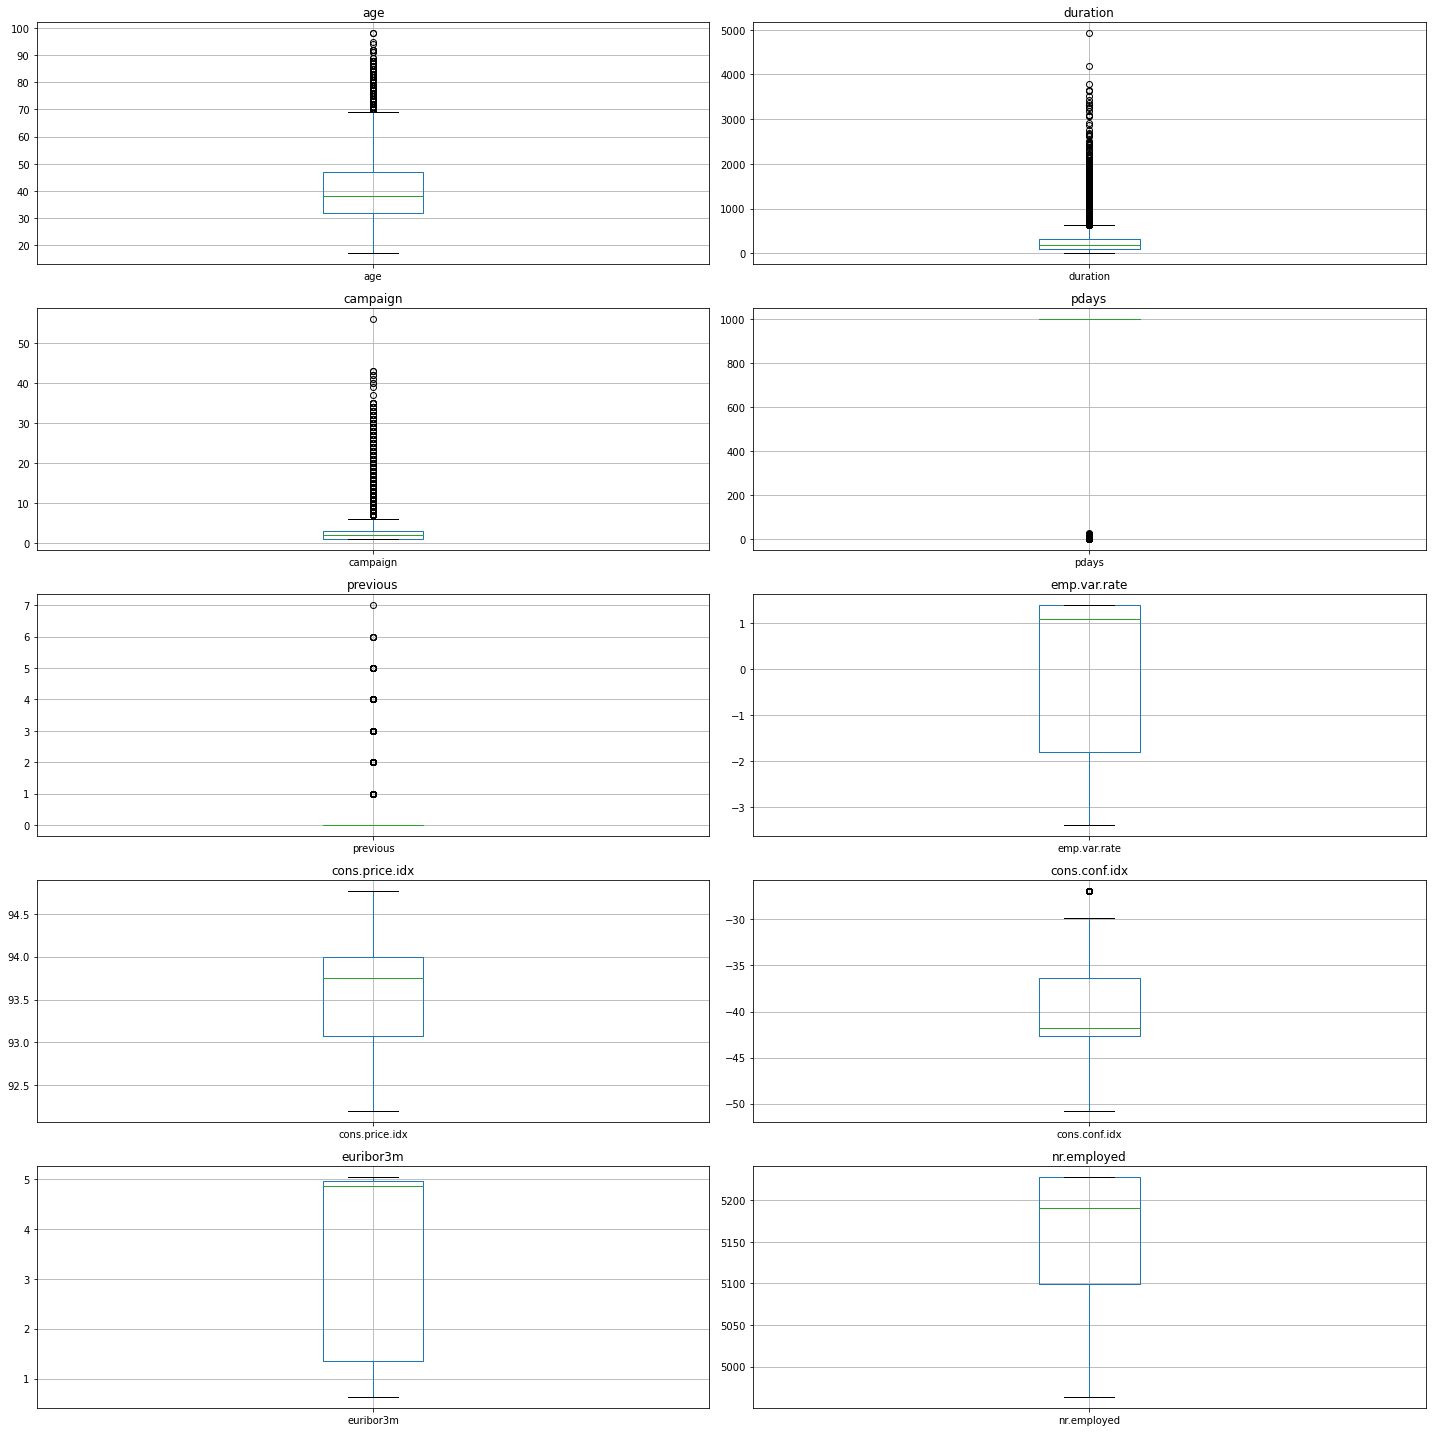

In [34]:
columns = outliers_using_MAD.columns

ncols = 2
nrows = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

for i, column in enumerate(columns):
    ax = axes[i // ncols, i % ncols]
    df.boxplot(column=column, ax=ax)
    ax.set_title(column)

# plt.delaxes(axes[-1,-1])
plt.tight_layout()
plt.show()

#### Our Findings: 

Using statistical tools like Mean Absolute Deviation (MAD) and visualiztion with box-plot we have identified a number of outliers.

**However, we have decided to keep the outliers in our data, as we will be using various tree based machine learning models and boosting techniques that unlike distance based algorithms have no effect on outliers.**

### Finding Duplicate Values

In [35]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [36]:
# Count occurrences of each duplicate value
duplicate_count = df.duplicated().sum()
print(f'There are {duplicate_count} duplicate rows in the dataframe.')


There are 12 duplicate rows in the dataframe.


In [37]:
# Keep one occurrence of each duplicate value
df = df.drop_duplicates(keep='first')

In [38]:
duplicate_count = df.duplicated().sum()
print(f'There are {duplicate_count} duplicate rows in the dataframe.')

There are 0 duplicate rows in the dataframe.


In [39]:
df=df.drop(['duration'],axis=1)

## Encoding our data

In [40]:
df['y'] = df['y'].map({'yes':1,'no':0})

#### Encoding our data

In [41]:
cat_cols = df.select_dtypes("object")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Model Building

In [42]:
X = df.drop('y',axis =1)

y = df['y']

In [43]:
y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

### Splitting our data

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,stratify=y)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32940, 19)
(32940,)
(8236, 19)
(8236,)


### Scaling the Data

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling our imbalanced dataset

In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 3711
Before OverSampling, counts of label '0': 29229 



#### Applying SMOTE technique for oversampling

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [49]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

After OverSampling, counts of label '1': 29229
After OverSampling, counts of label '0': 29229 



## Fitting Classfication Models

In [50]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define the models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier())
]

# Create an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
# Evaluate each model 
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
# Print the evaluation metrics DataFrame
metrics_df['Mean'] = (metrics_df["Accuracy"] + metrics_df["Precision"] + metrics_df["Recall"] + metrics_df["F1-score"])/4
metrics_df.sort_values(by=['Mean'],ascending=False)


,Model,Accuracy,Precision,Recall,F1-score,Mean
2,Random Forest,0.886231,0.873793,0.886231,0.878739,0.881249
3,Gradient Boosting,0.877610,0.880840,0.877610,0.879167,0.878807
5,SVM,0.824186,0.878557,0.824186,0.844627,0.842889
1,Decision Tree,0.830986,0.845941,0.830986,0.837972,0.836471
0,Logistic Regression,0.803303,0.876885,0.803303,0.829917,0.828352
6,KNN,0.769791,0.855963,0.769791,0.802439,0.799496
4,Gaussian Naive Bayes,0.743565,0.871515,0.743565,0.786471,0.786279


## Predicting with best Classification Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

## Evaluating best Classification Model

In [52]:
from sklearn.metrics import plot_confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7308
           1       0.50      0.38      0.43       928

    accuracy                           0.89      8236
   macro avg       0.71      0.67      0.68      8236
weighted avg       0.88      0.89      0.88      8236



**We are getting overall accuracy score of 88 - 90 %**

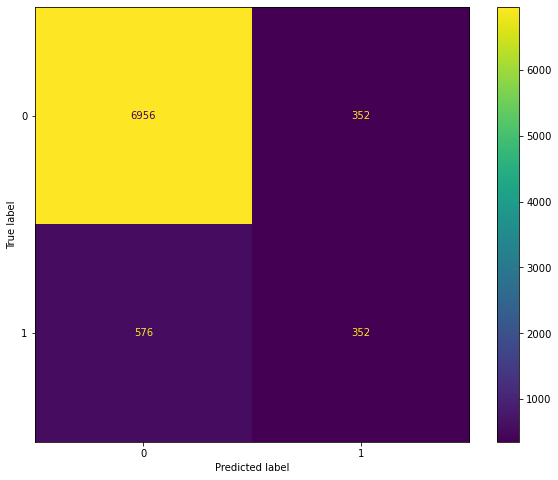

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(rfc, X_test, y_test, ax=ax)
plt.show()

**Our Insights:**

1) We see that our True Positive and True Negative figures are generally predicting well.

2) We should try to improve our False Negative figures to try to give more accurate predictions


### Checking for overfitting using cross validation scores

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Define the logistic regression model
model = RandomForestClassifier(random_state = 102)

# Evaluate the model using cross-validation
train_scores = cross_val_score(model, X_train, y_train, cv=5)
test_scores = cross_val_score(model, X_test, y_test, cv=5)


scores_df = pd.DataFrame({
    'Training_Score': [train_scores.mean(), train_scores.std()],
    'Testing_Score': [test_scores.mean(), test_scores.std()]
}, index=['mean', 'std'])

scores_df


,Training_Score,Testing_Score
mean,0.937306,0.892909
std,0.063907,0.003923


**Our Findings:**

Since the training score and testing score using cross_val_score is very close to each other so we may conclude that the model is generally not overfitting

## Using Artificial Neural Network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)


Epoch 1/50
1827/1827 [==============================] - 11s 5ms/step - loss: 0.5742 - accuracy: 0.7157 - val_loss: 0.5281 - val_accuracy: 0.8136
Epoch 2/50
1827/1827 [==============================] - 7s 4ms/step - loss: 0.5561 - accuracy: 0.7325 - val_loss: 0.5078 - val_accuracy: 0.8100
Epoch 3/50
1827/1827 [==============================] - 7s 4ms/step - loss: 0.5515 - accuracy: 0.7367 - val_loss: 0.5266 - val_accuracy: 0.8173
Epoch 4/50
1827/1827 [==============================] - 7s 4ms/step - loss: 0.5497 - accuracy: 0.7370 - val_loss: 0.5097 - val_accuracy: 0.8146
Epoch 5/50
1827/1827 [==============================] - 8s 4ms/step - loss: 0.5457 - accuracy: 0.7384 - val_loss: 0.5358 - val_accuracy: 0.8052
Epoch 6/50
1827/1827 [==============================] - 7s 4ms/step - loss: 0.5448 - accuracy: 0.7402 - val_loss: 0.5108 - val_accuracy: 0.8108
Epoch 7/50
1827/1827 [==============================] - 7s 4ms/step - loss: 0.5419 - accuracy: 0.7416 - val_loss: 0.4872 - val_accuracy

In [56]:
test_loss, test_acc

(0.5137053728103638, 0.8181155920028687)

In [57]:
y_pred_ann = model.predict(X_test)

258/258 [==============================] - 1s 2ms/step


In [58]:
threshold = 0.5
y_pred_ann = (y_pred_ann >= threshold).astype(int)

In [59]:
from sklearn.metrics import plot_confusion_matrix,classification_report
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7308
           1       0.34      0.63      0.44       928

    accuracy                           0.82      8236
   macro avg       0.64      0.74      0.67      8236
weighted avg       0.88      0.82      0.84      8236



**Our Insights:**

1) ANN is giving us less accuracy score than Random forest classifier

2) Due to model complexity and data imbalanced our ANN model is not performing as well as other classification models.

### Hyperparameter tuning final model

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a Random Forest Classifier object
rfc_model = RandomForestClassifier()

# Define the parameter distributions to search over
param_dist = {'n_estimators': [100, 200, 500],
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [1, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rfc_model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=3,
                                   random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best parameters found
print('Best parameters:', random_search.best_params_)

# Train the Random Forest Classifier with the best hyperparameters
rfc_model.set_params(**random_search.best_params_)
rfc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc_model.predict(X_test)


Best parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [61]:
from sklearn.metrics import plot_confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7308
           1       0.54      0.39      0.45       928

    accuracy                           0.89      8236
   macro avg       0.73      0.67      0.70      8236
weighted avg       0.88      0.89      0.89      8236



## Testing final model with previously unseen data

In [62]:
X1 = X.sample(1)
X1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
19796,51,0,0,3,0,0,0,0,1,0,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1


In [63]:
y1 = y[X1.index].values[0]
y1

0

In [64]:
classes = ''

if y1 ==1:
    classes = 'has subscribed to term deposit'
else:
    classes = 'has not subscribed to term deposit'

### Scaling our sample data

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Scale the sample data
sample_scaled = scaler.transform(X1)
sample_scaled

array([[0.41975309, 0.        , 0.        , 0.42857143, 0.        ,
        0.        , 0.        , 0.        , 0.11111111, 0.        ,
        0.        , 1.        , 0.        , 0.5       , 1.        ,
        0.48441154, 0.61506276, 0.98209023, 1.        ]])

### Fitting and Predicting with trained model

In [66]:
rfc_model.fit(X_train,y_train)
model_pred = rfc_model.predict(sample_scaled)

In [67]:
correct = ''
if model_pred[0] == y1:
    correct = 'correctly'
else:
    correct = 'incorrectly'

In [68]:
print(f"Our model is predicting the output to be of class {model_pred[0]} and our actual output is class {y1}. That means based on the features provided our model has {correct} predicted that the customer {classes}")

Our model is predicting the output to be of class 0 and our actual output is class 0. That means based on the features provided our model has correctly predicted that the customer has not subscribed to term deposit


# Task3:-Suggestions to the Bank market team to make  customers  buy the product.

For this task we will download a fresh copy of the dataset and try to to group similar customers using KMeans clustering algorithms; we will find the important features with respect to the clusters and find out the which customers to target for marketing

In [69]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We will drop duration column and remove duplicates

In [70]:
df = df.drop_duplicates(keep='first')
df=df.drop(['duration'],axis=1)

#### One hot encoding our dataset

In [71]:
df2 = pd.get_dummies(data = df,drop_first=True)

In [72]:
df2.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


#### Scaling and chosing our appropiate number of cluster using elbow method

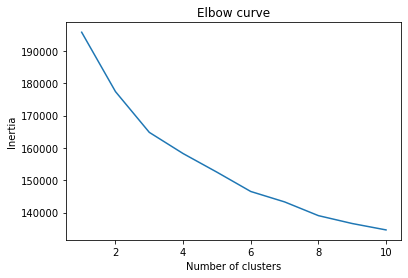

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_cluster_scaled = scaler.fit_transform(df2)

# Apply KMeans clustering with different number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()




#### We chose n_cluster as 2

In [74]:
# Choose the number of clusters and fit the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_cluster_scaled)

# Add the cluster labels to the original dataframe
df2['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [75]:
df2["y_yes"].value_counts()

0    36537
1     4639
Name: y_yes, dtype: int64

Here 1 means that the customer has subscribed to the term deposit

In [76]:
df2[df2['cluster'] ==1]["y_yes"].value_counts()

0    25910
1     1282
Name: y_yes, dtype: int64

In [77]:
df2[df2['cluster'] ==0]["y_yes"].value_counts()

0    10627
1     3357
Name: y_yes, dtype: int64

We see that in our cluster = 1, there are more than 31 % of the data are comprised of customers having the term deposit.

On the other hand in the cluster = 0, there are only 95% of the data are comprised of customers not having the term deposit

So we may conclude that we have successfully clustered our customer and we have defined whether each cluster of customer have subscribed to the term deposit. Here cluster 1 are the customers having subscribed to the term deposit

#### Finding the features that are highly correlated with our clusters 

In [78]:
df2.corr()['cluster'].sort_values()[:-1]

previous                        -0.458838
y_yes                           -0.288949
poutcome_success                -0.258133
month_sep                       -0.165214
month_mar                       -0.161651
month_oct                       -0.159366
month_may                       -0.144522
job_student                     -0.138265
marital_single                  -0.115557
job_retired                     -0.088876
month_dec                       -0.085183
housing_yes                     -0.063781
education_university.degree     -0.030902
day_of_week_mon                 -0.028518
education_high.school           -0.022580
day_of_week_thu                 -0.013639
job_unemployed                  -0.010466
marital_unknown                 -0.009119
loan_yes                        -0.002442
education_illiterate            -0.002176
education_unknown               -0.001653
job_management                   0.001005
housing_unknown                  0.004760
loan_unknown                     0

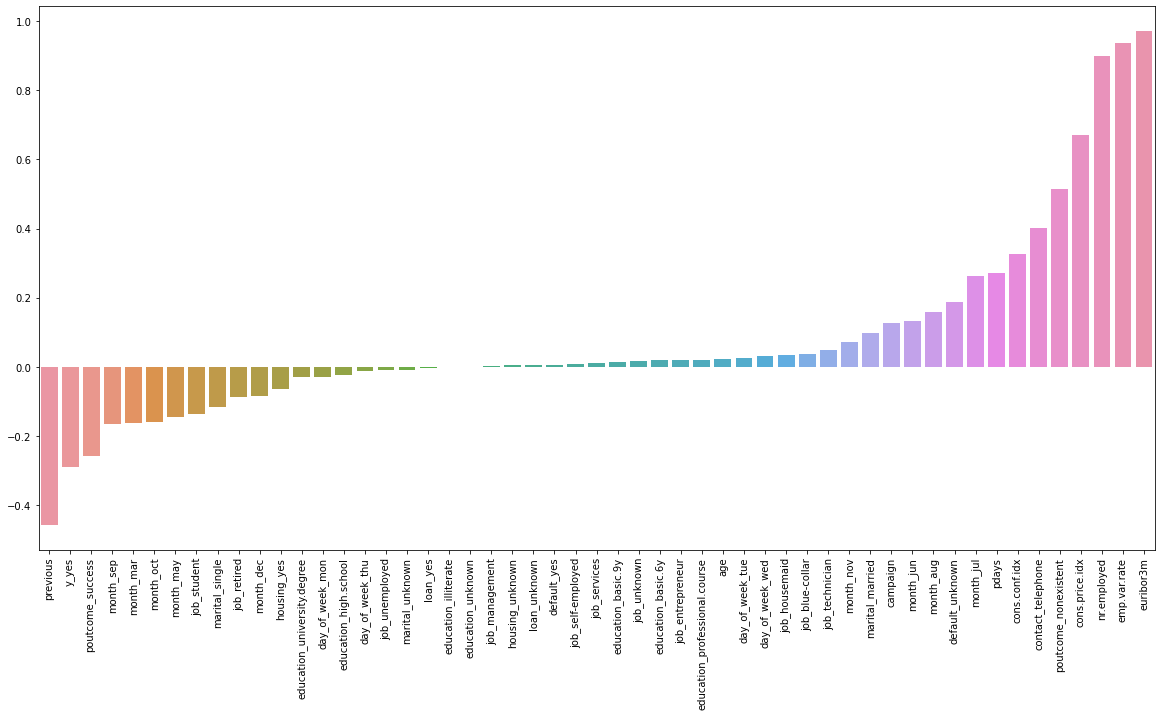

In [79]:
plt.figure(figsize = (20,10))
sns.barplot(x =df2.corr()['cluster'].sort_values()[:-1].index,y =df2.corr()['cluster'].sort_values()[:-1].values)
plt.xticks(rotation = 90);

**Our Insights:**

Here we see that the features of 'previous','y_yes' and 'poutcome_success are highly correlated with the clusters and the features of 'euribor3m,, 'emp.var.rate' and 'nr employed' are also correlated to our clusters

#### Visualizing some of the important features with respect to the clusters

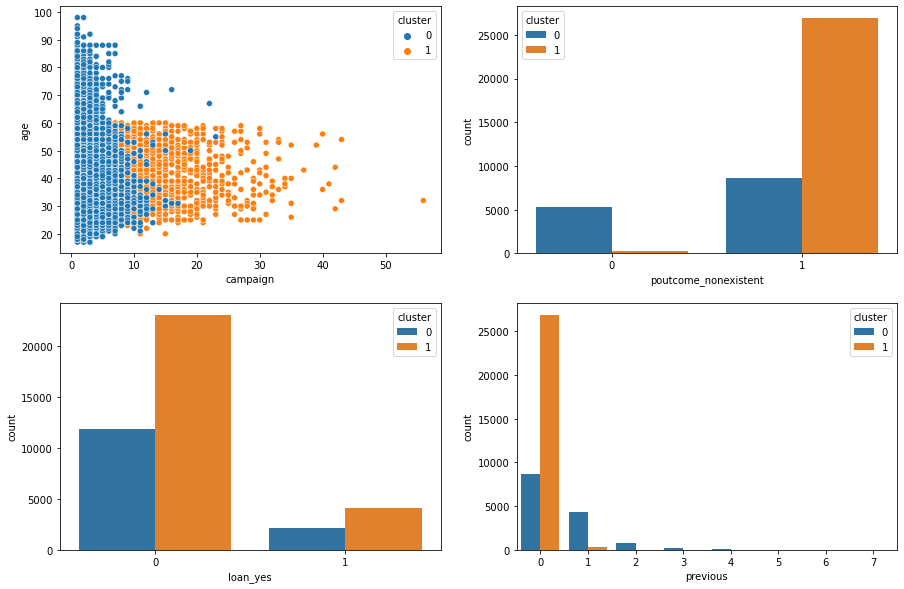

In [80]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15,10))

# Create subplots for first 4 plots
plt.subplot(2, 2, 1)
sns.scatterplot(data=df2,x='campaign', y='age', hue='cluster')
plt.subplot(2, 2, 2)
sns.countplot(data=df2,x='poutcome_nonexistent', hue='cluster')
plt.subplot(2, 2, 3)
sns.countplot(data=df2,x='loan_yes', hue='cluster')
plt.subplot(2, 2, 4)
sns.countplot(data=df2,x='previous', hue='cluster')
plt.show()
# Show the plot
plt.show()


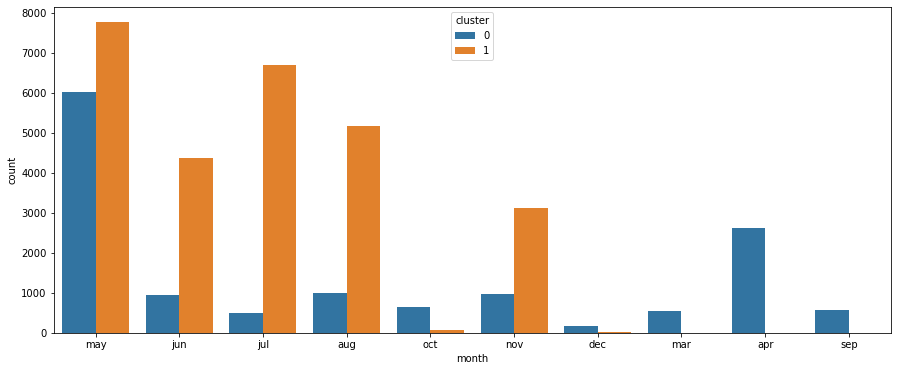

In [81]:
plt.figure(figsize = (15,6))
sns.countplot(data =df,x='month',hue ='cluster');

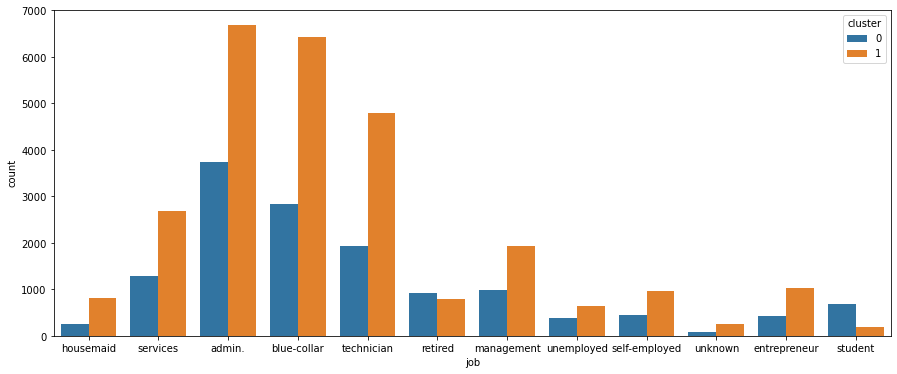

In [82]:
plt.figure(figsize = (15,6))
sns.countplot(data =df,x='job',hue ='cluster');

### Our Suggestion to the marketing team:

1) The new marketing campaign should be targeted mostly to new customers holding jobs in admin, blue-collar or who is a technician.

2) The new marketing campaign should be run on May and June, as it was previously seen during these months we were able to onboard many customer to subscribe to the term deposit

3) The new marketing campaign should be targeted to customers of age 30-45; and to those who were previously not targeted for marketing .

4) Finally we should be marketing to customers who does not have a personal loan, as they do not have a burden to pay off debts they can save some by subscribing to the term deposit.

5) A great marketing strategy could be that we may run a separate ad campaign to bring in customers who were previously reluctant to subscribe to the term deposit, like a higher rate deposit scheme for students only could be run as these students would eventually get jobs and become a great asset to the company portfolio.

# Model Comparison Report

To predict whether a customer will subscribe to a term deposit based on several features we have run many machine learning  classification models like Logistic regression, decision trees, random forest, gradient boosting, SVC, KNN etc. We also wanted to improve our model by hyperparameter tuning and also by trying to train an artificial neural network.

Our research suggested Random Forest Classifier as the best prediction results. We have run the model and got great accuracy score. 

It performed really well when we tested the data on previouly unseen data/ randomly picking data and predicting the outcome.

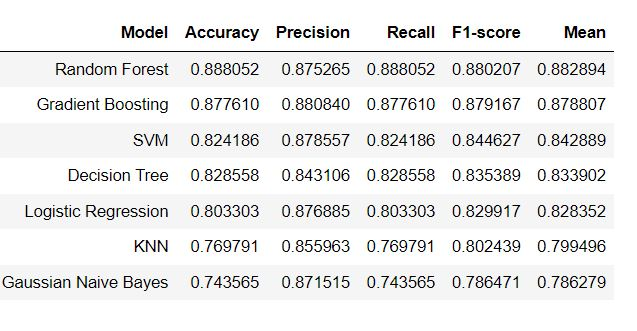

# Report on Challenges faced

The dataset was a challenging problem right from the start. Here are some of the challenges faced: 

1) First of the dataset is really quite large. It took a long time to train our models; we overcame the challenge by dividing the dataset into smaller batches and then ran the prediction on these smaller batches to get the idea, which model will work best.

2) The dataset had many missing values disguised as 'unknown'. For some of the features it made sense that the data could be 'unknown' but for other features it may be a problem. In the end we decided to keep the 'unknown' data points as a class of its own to prevent model complexity.

3) The dataset was highly imbalanced that became a problem when we were getting biased accuracy scores. We overcame the problem by using upsampling techniques like SMOTE.

# Conclusion

The bank marketing dataset is a fascinating dataset which tests one's boundaries and scope of knowledge related to machine learning classification algorithms, imbalanced datasets, model creation, tuning and creating a predicting model that correctly predicts whether a customer will subscribe to a term deposit or not. We overcame lots of challenges to build a great predictive model and cluster customers based on similar features to suggest a great marketing campaign. 